# Arbol de Decisión


## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obteniendo Datos


In [2]:
dataf = pd.read_csv('./processed/mammographic_masses_clean.csv')

In [3]:
dataf.head()

,Age,Shape,Margin,Density,Severity
0,67,3,5,3,1
1,58,4,5,3,1
2,28,1,1,3,0
3,57,1,5,3,1
4,76,1,4,3,1


## División en Conjunto de entrenamiento y de prueba


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = dataf.drop('Severity',axis=1)
y = dataf['Severity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

## Árboles de decisión


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
arbol = DecisionTreeClassifier(criterion='gini',random_state=101)

In [10]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## Predicción y Evaluación¶
Evaluando el árbol de decisiones.

In [11]:
predictions = arbol.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

### Matriz de confusión

In [13]:
print(confusion_matrix(y_test,predictions))

[[78 28]
 [26 76]]


### Reporte de clasificación

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       106
           1       0.73      0.75      0.74       102

   micro avg       0.74      0.74      0.74       208
   macro avg       0.74      0.74      0.74       208
weighted avg       0.74      0.74      0.74       208



## Visualización de árbol

In [1]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(dataf.columns[1:])
features

NameError: name 'dataf' is not defined

In [28]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

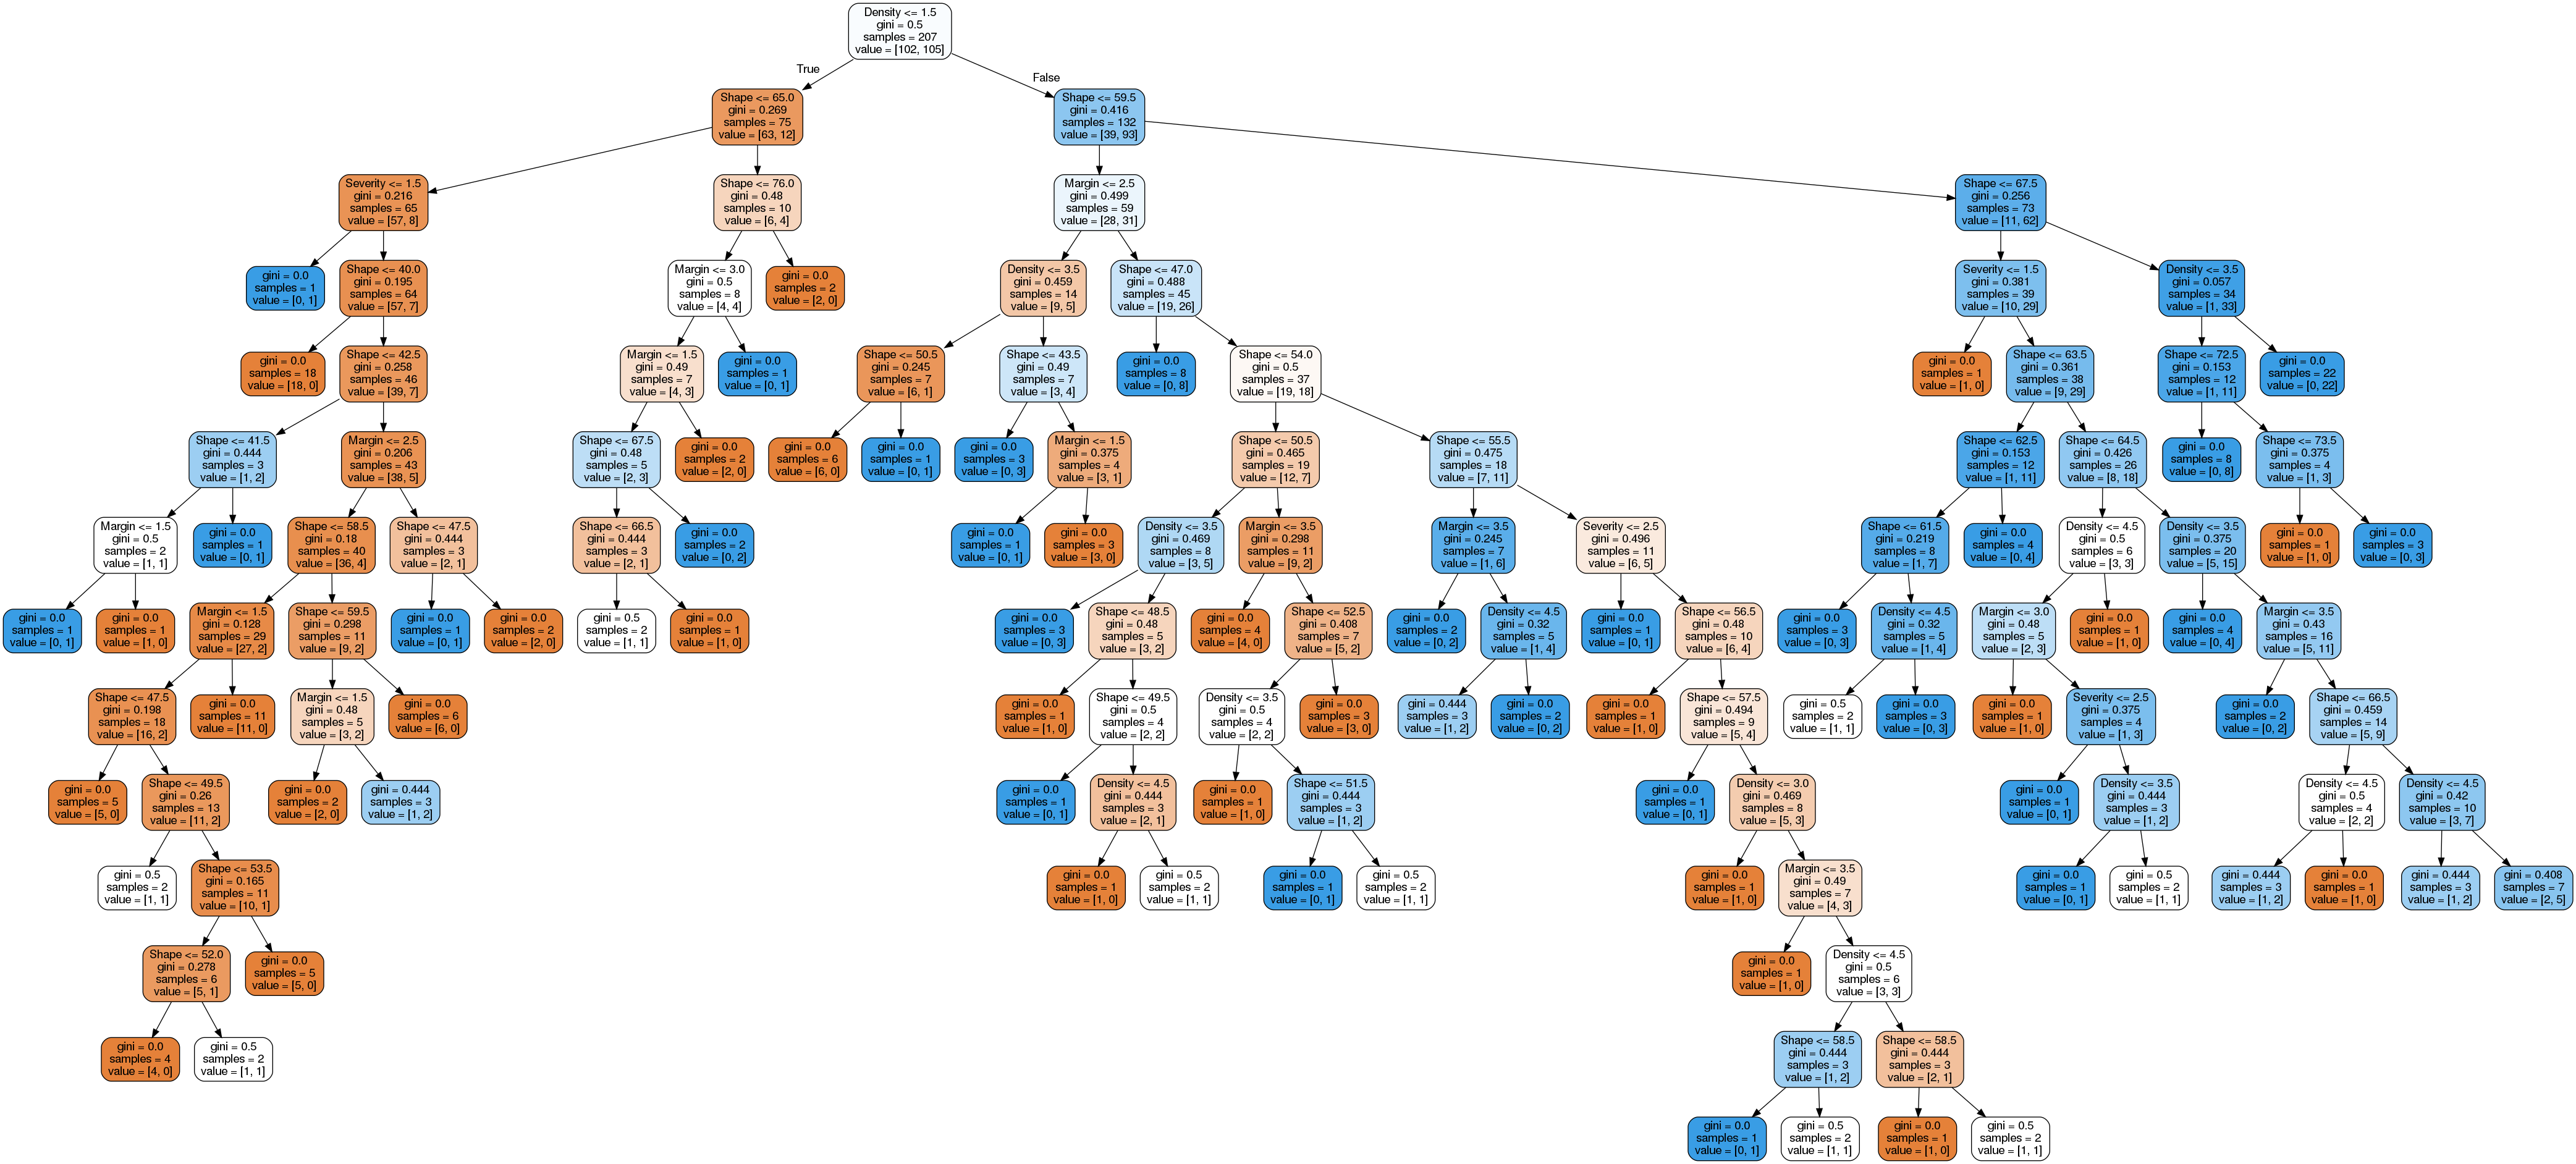

In [30]:
dot_data = StringIO()  
export_graphviz(arbol, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Bosques Aleatorios

Ahora comparemos el modelo de árbol de decisión con un bosque aleatorio.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=101,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,rfc_pred))

[[234  92]
 [ 72 226]]


In [35]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       326
           1       0.71      0.76      0.73       298

   micro avg       0.74      0.74      0.74       624
   macro avg       0.74      0.74      0.74       624
weighted avg       0.74      0.74      0.74       624

